Q1 
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

Steps to follow
importing the dataset and performing basic EDA.
visualization and feature engineering
Decision Tree Classifier
tree visualization
Decision Tree Regressor

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.rename(columns={'Undergrad':'undergrad','Marital.Status':'marital_status','Taxable.Income':'tax_income','City.Population':'city_pop','Work.Experience':'work_exp','Urban':'urban'}, inplace=True)
df = data.copy()
df

undergrad marital_status  tax_income  city_pop  work_exp urban
0          NO         Single       68833     50047        10   YES
1         YES       Divorced       33700    134075        18   YES
2          NO        Married       36925    160205        30   YES
3         YES         Single       50190    193264        15   YES
4          NO        Married       81002     27533        28    NO
..        ...            ...         ...       ...       ...   ...
595       YES       Divorced       76340     39492         7   YES
596       YES       Divorced       69967     55369         2   YES
597        NO       Divorced       47334    154058         0   YES
598       YES        Married       98592    180083        17    NO
599        NO       Divorced       96519    158137        16    NO

[600 rows x 6 columns]

In [3]:
#defining function to assign risky and good values

def filt(x):
    if x<=30000:
        return 'Risky'
    else:
        return 'Good'

In [4]:
df['fraud'] = df['tax_income'].copy()
df['fraud'] = df['fraud'].apply(filt)
df
df.fraud.value_counts()

Good     476
Risky    124
Name: fraud, dtype: int64

In [5]:
label_encoder = preprocessing.LabelEncoder()
df['undergrad']= label_encoder.fit_transform(df['undergrad']) 
df['urban']= label_encoder.fit_transform(df['urban']) 
df['marital_status']= label_encoder.fit_transform(df['marital_status']) 
df['fraud']= label_encoder.fit_transform(df['fraud'])

df

undergrad  marital_status  tax_income  city_pop  work_exp  urban  fraud
0            0               2       68833     50047        10      1      0
1            1               0       33700    134075        18      1      0
2            0               1       36925    160205        30      1      0
3            1               2       50190    193264        15      1      0
4            0               1       81002     27533        28      0      0
..         ...             ...         ...       ...       ...    ...    ...
595          1               0       76340     39492         7      1      0
596          1               0       69967     55369         2      1      0
597          0               0       47334    154058         0      1      0
598          1               1       98592    180083        17      0      0
599          0               0       96519    158137        16      0      0

[600 rows x 7 columns]

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   undergrad       600 non-null    int32
 1   marital_status  600 non-null    int32
 2   tax_income      600 non-null    int64
 3   city_pop        600 non-null    int64
 4   work_exp        600 non-null    int64
 5   urban           600 non-null    int32
 6   fraud           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


undergrad  marital_status    tax_income       city_pop    work_exp  \
count  600.000000      600.000000    600.000000     600.000000  600.000000   
mean     0.520000        1.046667  55208.375000  108747.368333   15.558333   
std      0.500017        0.821958  26204.827597   49850.075134    8.842147   
min      0.000000        0.000000  10003.000000   25779.000000    0.000000   
25%      0.000000        0.000000  32871.500000   66966.750000    8.000000   
50%      1.000000        1.000000  55074.500000  106493.500000   15.000000   
75%      1.000000        2.000000  78611.750000  150114.250000   24.000000   
max      1.000000        2.000000  99619.000000  199778.000000   30.000000   

            urban       fraud  
count  600.000000  600.000000  
mean     0.503333    0.206667  
std      0.500406    0.405252  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      1.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.000000

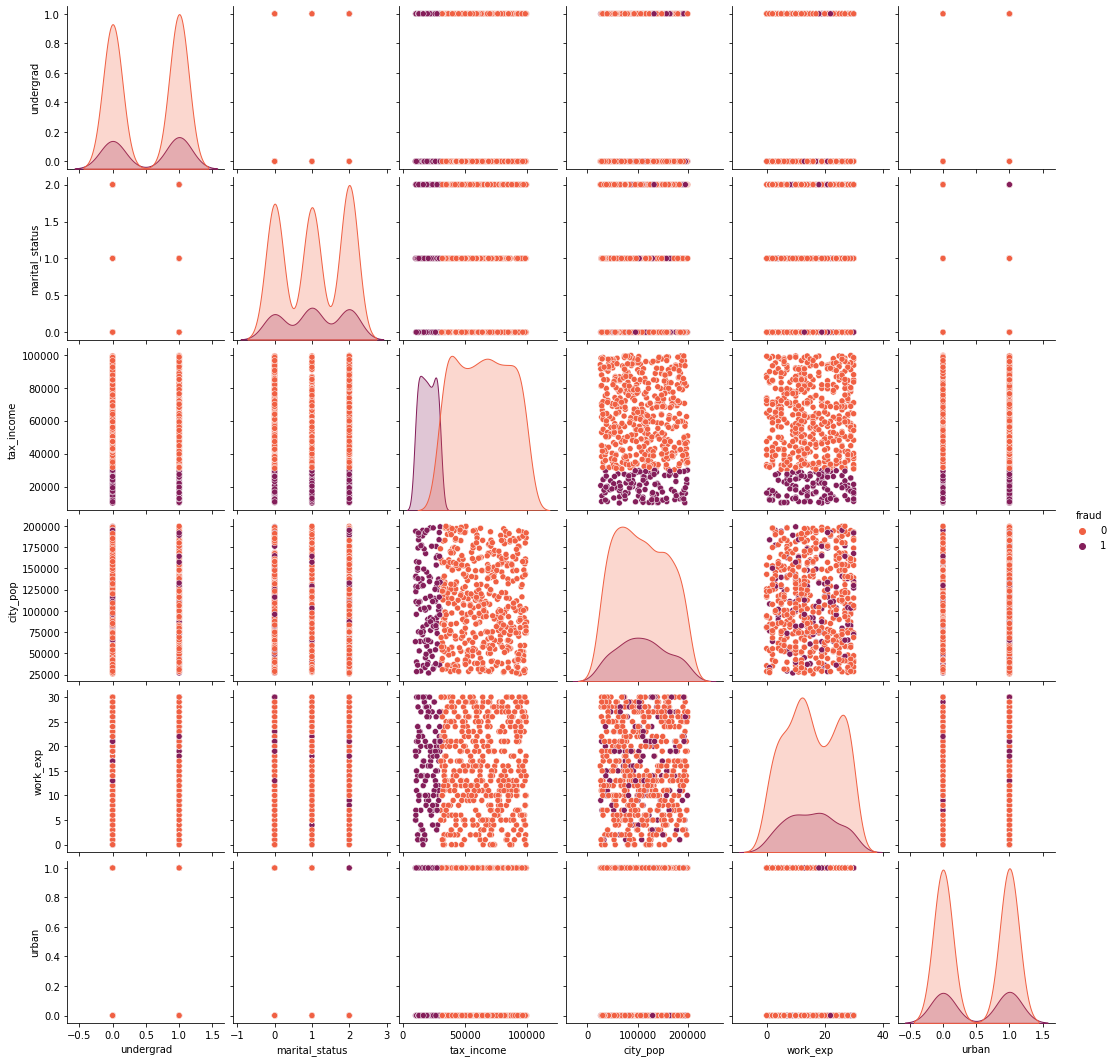

In [7]:
# visualization using pair plot
sns.pairplot(df,hue='fraud',palette='rocket_r')

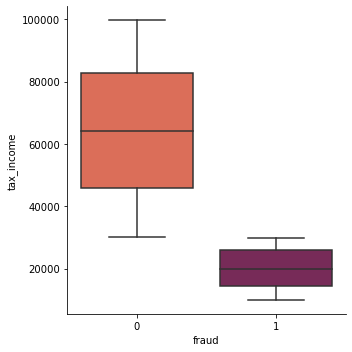

In [8]:
sns.catplot(x='fraud',y='tax_income',data=df,kind='box',palette='rocket_r')

In [9]:
#feature engineering
# train test split
X = df.iloc[:,:-1]
y =df.fraud

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [11]:
# decision tree classifier
# default parameters
model = DecisionTreeClassifier() 
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [12]:
# evaluation
confusion_matrix(y_test,pred)
# very good

array([[146,   0],
       [  0,  34]], dtype=int64)

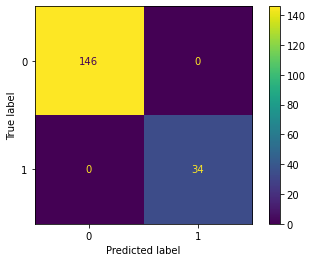

In [13]:
plot_confusion_matrix(model,X_test,y_test)

In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        34

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [15]:
model.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [16]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) 
# tax_income only matters

Feature Importance
undergrad                      0.0
marital_status                 0.0
tax_income                     1.0
city_pop                       0.0
work_exp                       0.0
urban                          0.0

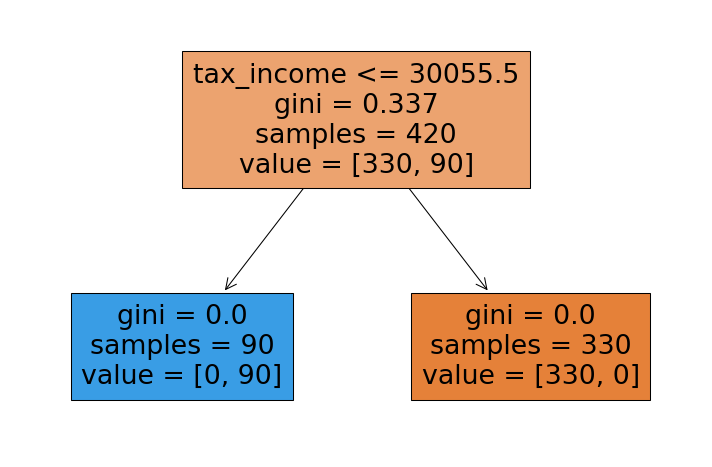

In [17]:
# tree visualization
plt.figure(figsize=(12,8), dpi = 75)
plot_tree(model,filled=True,feature_names=X.columns);

# gini (CART) default criteria

In [18]:
# model result report
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=75)
    plot_tree(model,filled=True,feature_names=X.columns);

In [19]:
# trying different parameters
 #Using max depth
trimmed_tree = DecisionTreeClassifier(max_depth=2)
trimmed_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        34

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180





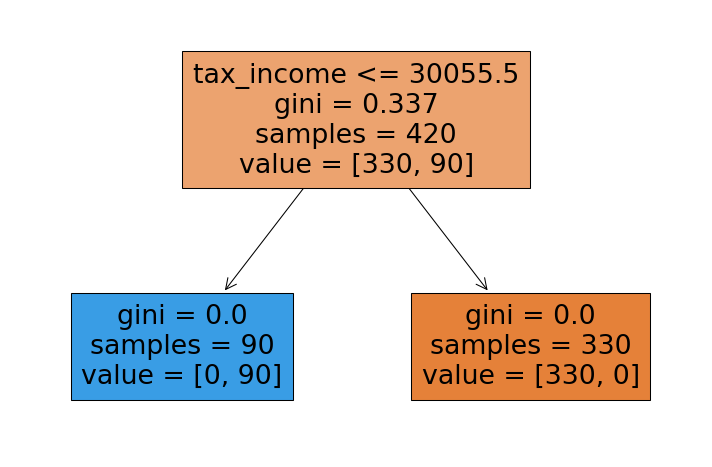

In [20]:
report_model(trimmed_tree)
# no significant difference as the  model is of only depth 2.

In [21]:
# max leaf nodes
trim2_tree = DecisionTreeClassifier(max_leaf_nodes=2)
trim2_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        34

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180





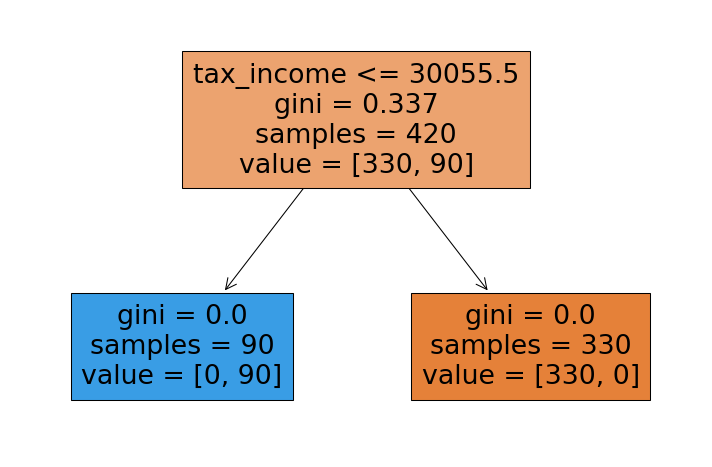

In [22]:
report_model(trim2_tree)
# same results

In [23]:
#Trying with crtieria C.50
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        34

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180





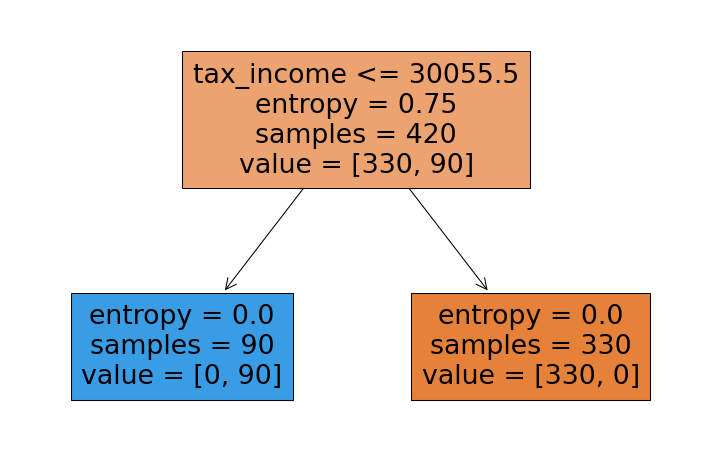

In [24]:
report_model(entropy_tree) #entropy values are visible

In [25]:
# decision tree regressor
 # default parameters

model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
pred2 = model2.predict(X_test)
confusion_matrix(y_test,pred2)

array([[146,   0],
       [  0,  34]], dtype=int64)

In [27]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        34

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



Q2 
Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [28]:
data = pd.read_csv('Company_Data.csv')
df = data.copy()
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

<AxesSubplot:xlabel='Sales', ylabel='Count'>

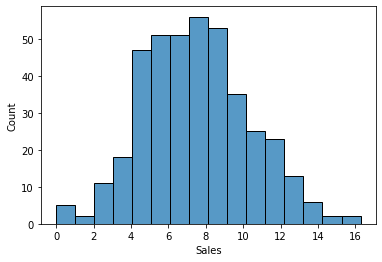

In [29]:
sns.histplot(df.Sales)
#Values greater than mean indicate high sales and lesser would be low sales.

In [30]:
#defining function to assign low sale and high sale

def filt(x):
    if x<= np.mean(df.Sales):
        return 'Low Sale'
    else: 
        return 'High Sale'

In [31]:
df['sales_cat'] = df['Sales'].copy()
df['sales_cat'] = df['sales_cat'].apply(filt)
df.pop('Sales')
df

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US  sales_cat  
0           17   Yes  Yes  High Sale  
1           10   Yes  Yes  High Sale  
2           12   Yes  Yes  High Sale  
3           14   Yes  Yes   Low Sale  
4           13   Yes   No   Low Sale  
..         ...   ...  ...        ...  
395         14   Yes  Yes  High Sale  
396         11    No  Yes   Low Sale  
397         18   Yes  Yes   Low Sale  
398         12   Yes  Yes   Low Sale  
399         16   Yes  Yes  High Sale  

[400 rows x 11 columns]

In [32]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df['sales_cat']= label_encoder.fit_transform(df['sales_cat'])

df

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  sales_cat  
0           17      1   1          0  
1           10      1   1          0  
2           12      1   1          0  
3           14      1   1          1  
4           13      1   0          1  
..         ...    ...  ..        ...  
395         14      1   1          0  
396         11      0   1          1  
397         18      1   1          1  
398         12      1   1          1  
399         16      1   1          0  

[400 rows x 11 columns]

In [33]:
df.sales_cat.value_counts()

1    201
0    199
Name: sales_cat, dtype: int64

In [34]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
 10  sales_cat    400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.2 KB


CompPrice      Income  Advertising  Population       Price  \
count  400.000000  400.000000   400.000000  400.000000  400.000000   
mean   124.975000   68.657500     6.635000  264.840000  115.795000   
std     15.334512   27.986037     6.650364  147.376436   23.676664   
min     77.000000   21.000000     0.000000   10.000000   24.000000   
25%    115.000000   42.750000     0.000000  139.000000  100.000000   
50%    125.000000   69.000000     5.000000  272.000000  117.000000   
75%    135.000000   91.000000    12.000000  398.500000  131.000000   
max    175.000000  120.000000    29.000000  509.000000  191.000000   

        ShelveLoc         Age   Education       Urban          US  sales_cat  
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000  
mean     1.307500   53.322500   13.900000    0.705000    0.645000    0.50250  
std      0.833475   16.200297    2.620528    0.456614    0.479113    0.50062  
min      0.000000   25.000000   10.000000    0.000000    0.000000    0.00000  
25%      1.000000   39.750000   12.000000    0.000000    0.000000    0.00000  
50%      2.000000   54.500000   14.000000    1.000000    1.000000    1.00000  
75%      2.000000   66.000000   16.000000    1.000000    1.000000    1.00000  
max      2.000000   80.000000   18.000000    1.000000    1.000000    1.00000

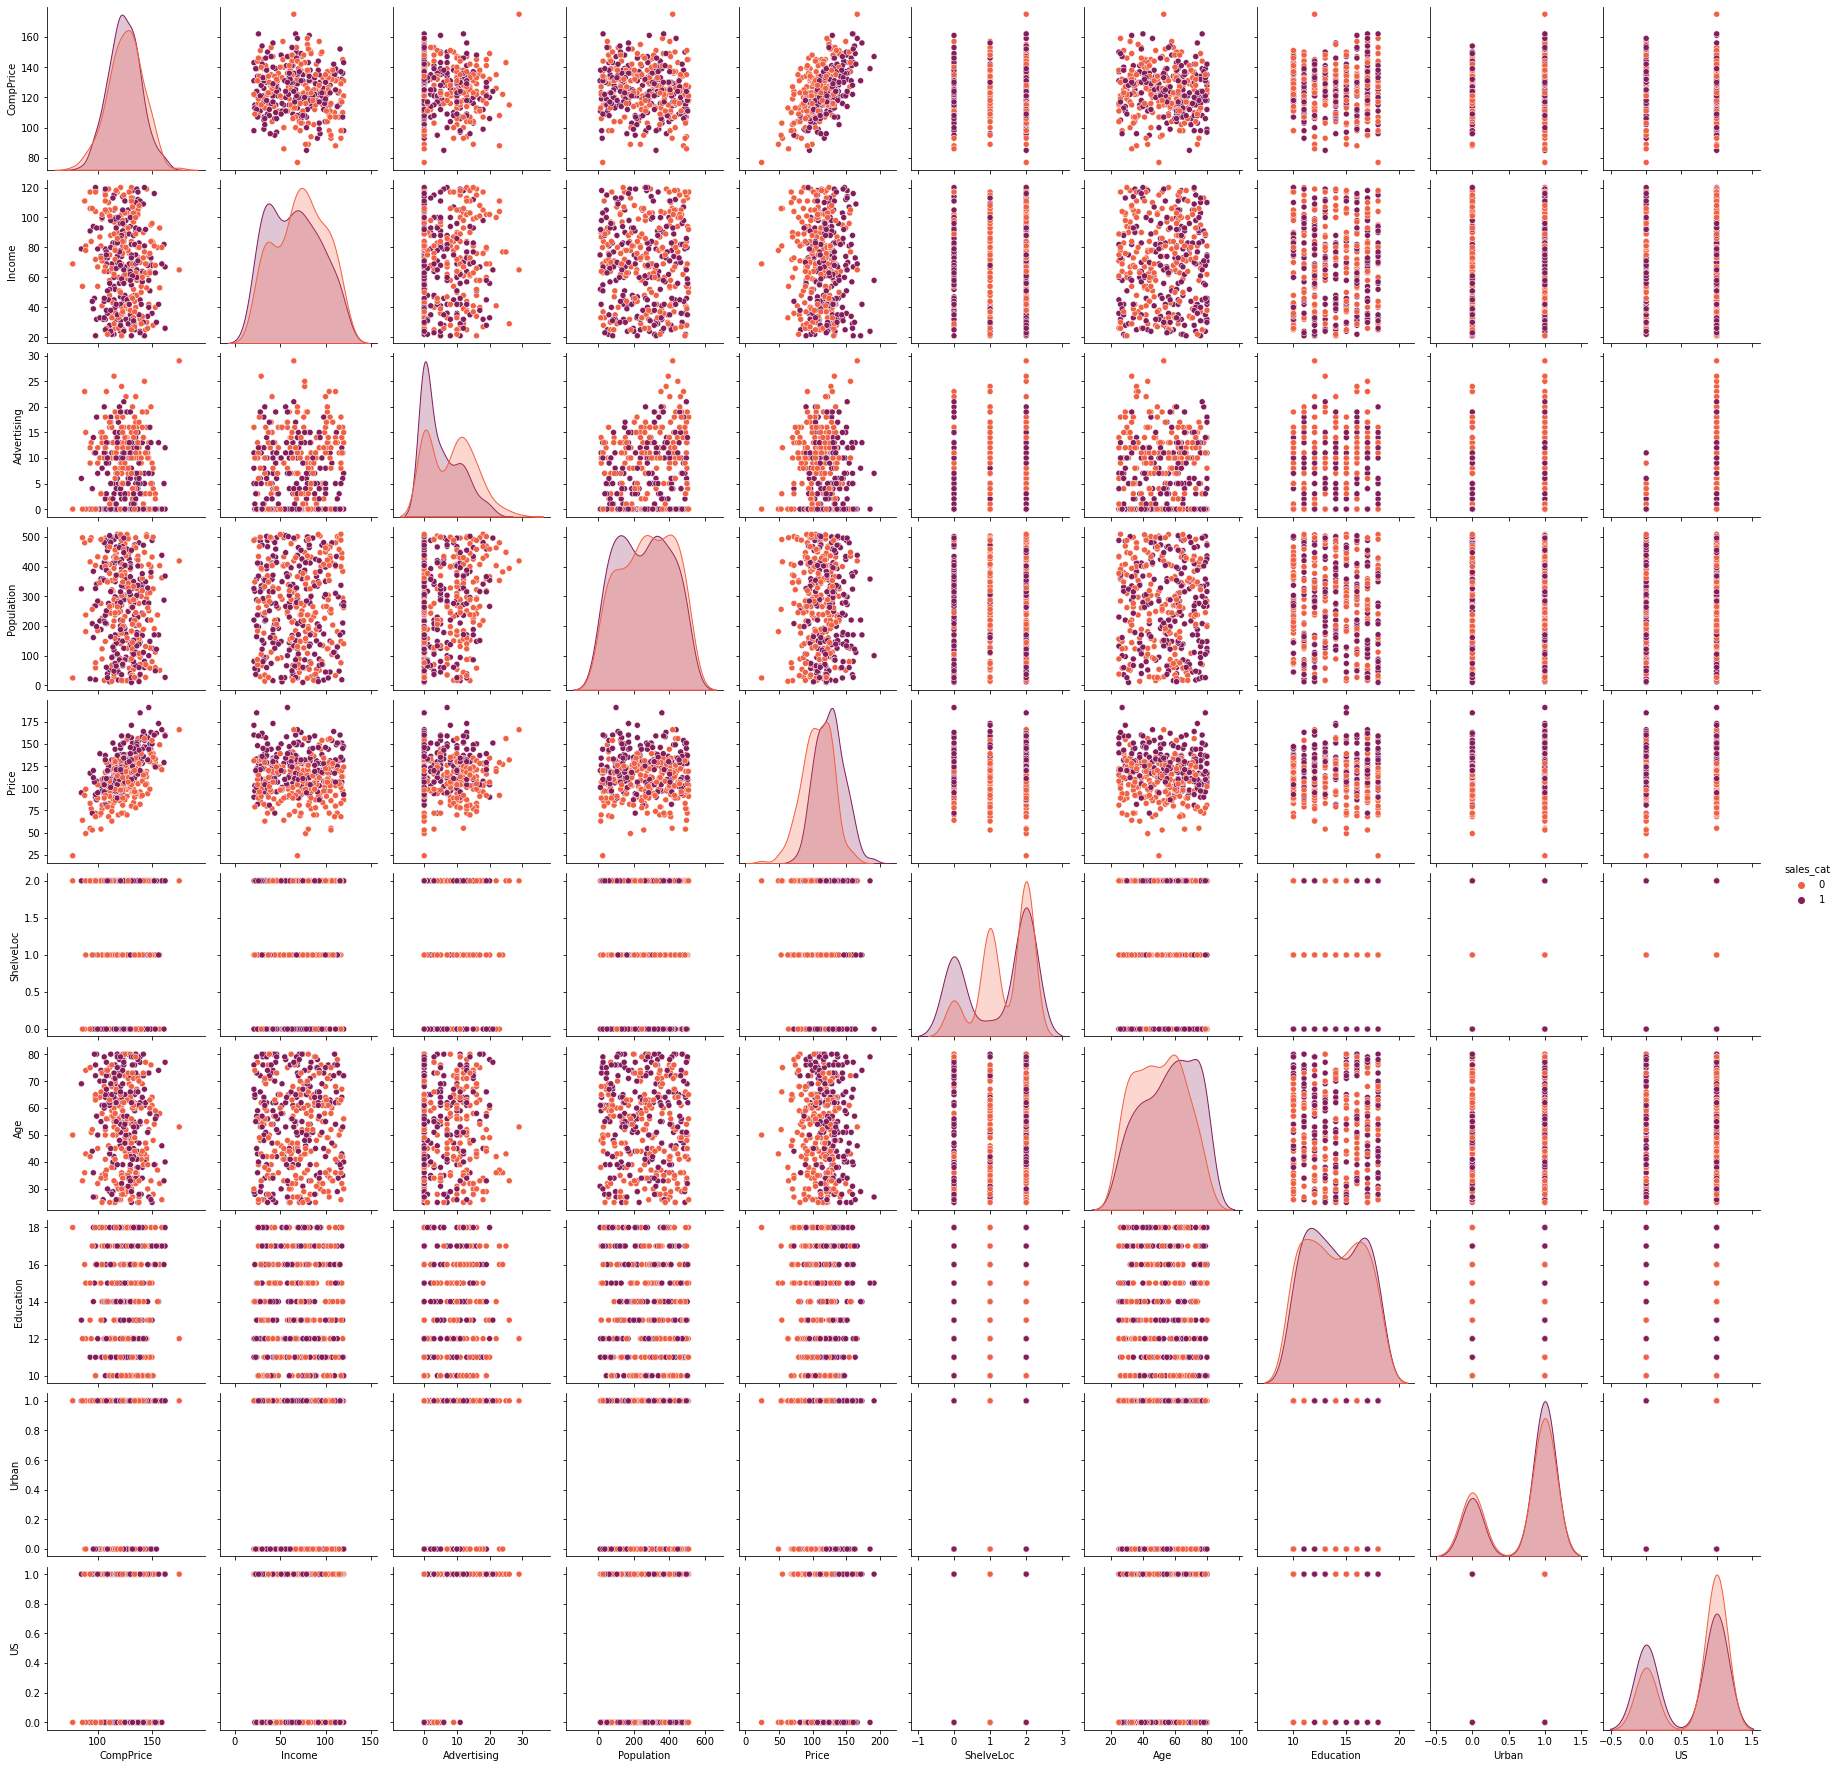

In [35]:
#visualizing
sns.pairplot(df,hue = 'sales_cat',palette='rocket_r')

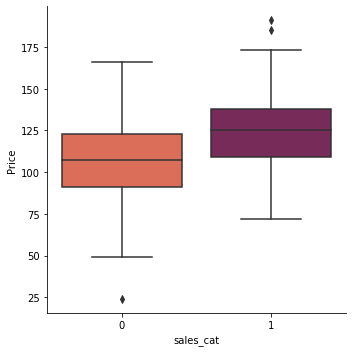

In [36]:
sns.catplot(x='sales_cat',y='Price',data=df,kind='box',palette='rocket_r')

In [37]:
# feature engineering
  # train test spilt

X = df.iloc[:,:-1]
y =df.sales_cat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
# decision tree classifier
 # default parameters
model = DecisionTreeClassifier() 
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [39]:
# evaluation
confusion_matrix(y_test,pred)
# falsely predicted values

array([[36, 24],
       [11, 49]], dtype=int64)

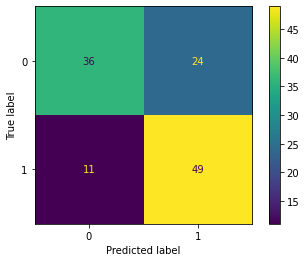

In [40]:
plot_confusion_matrix(model,X_test,y_test)

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67        60
           1       0.67      0.82      0.74        60

    accuracy                           0.71       120
   macro avg       0.72      0.71      0.70       120
weighted avg       0.72      0.71      0.70       120



In [42]:
model.feature_importances_

array([0.12473736, 0.09622921, 0.07511635, 0.08152498, 0.2804094 ,
       0.1514269 , 0.13133264, 0.05922317, 0.        , 0.        ])

In [43]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) 
# dependent on compprice,shelveloc, less dependent on urban and US

Feature Importance
CompPrice              0.124737
Income                 0.096229
Advertising            0.075116
Population             0.081525
Price                  0.280409
ShelveLoc              0.151427
Age                    0.131333
Education              0.059223
Urban                  0.000000
US                     0.000000

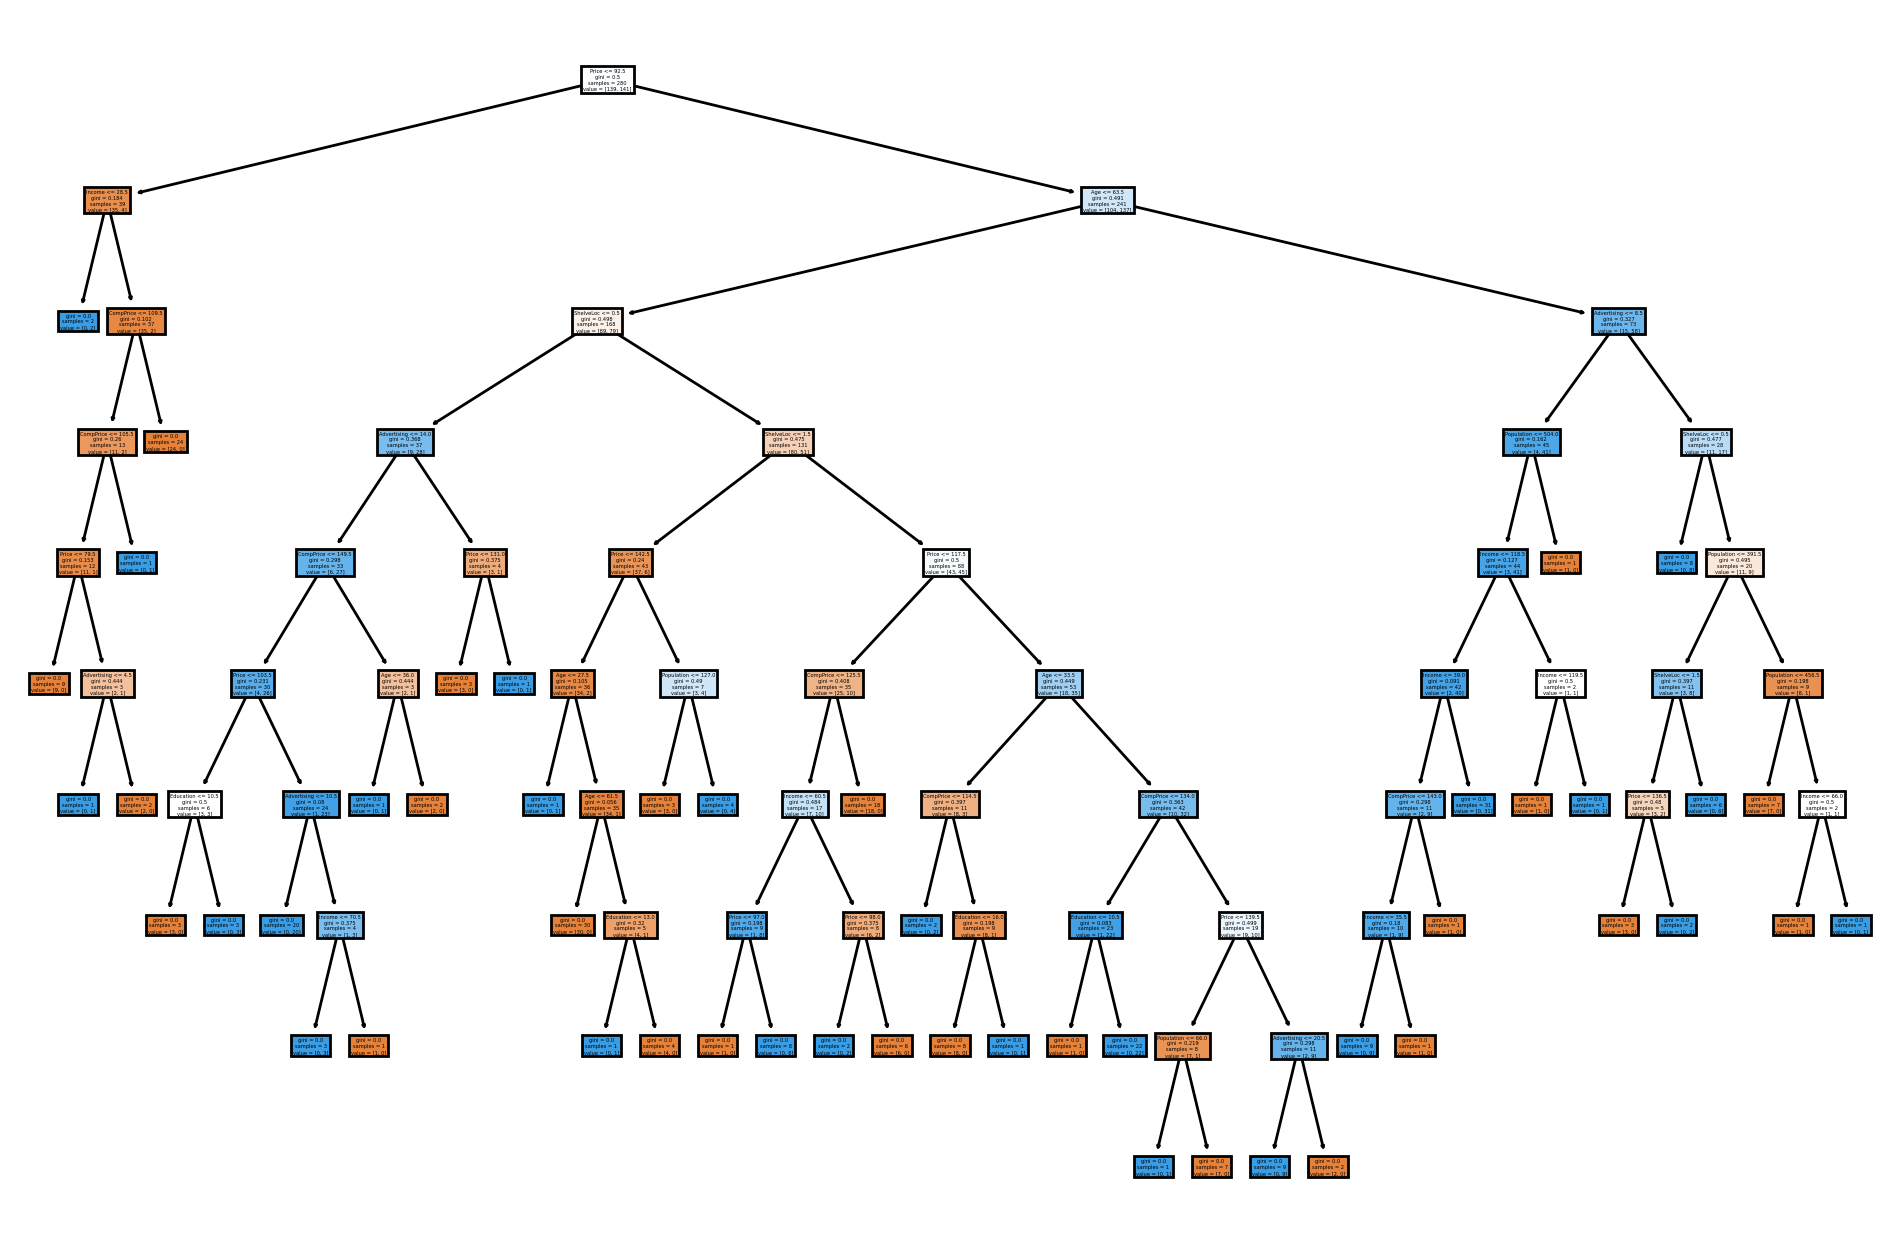

In [44]:
plt.figure(figsize=(12,8), dpi = 200)
plot_tree(model,filled=True,feature_names=X.columns);

# very large tree

In [45]:
#model result report
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(20,20),dpi=200)
    plot_tree(model,filled=True,feature_names=X.columns);

In [46]:
#trying different parameters
#max depth
trimmed_tree = DecisionTreeClassifier(max_depth=5)
trimmed_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        60
           1       0.66      0.82      0.73        60

    accuracy                           0.70       120
   macro avg       0.71      0.70      0.70       120
weighted avg       0.71      0.70      0.70       120





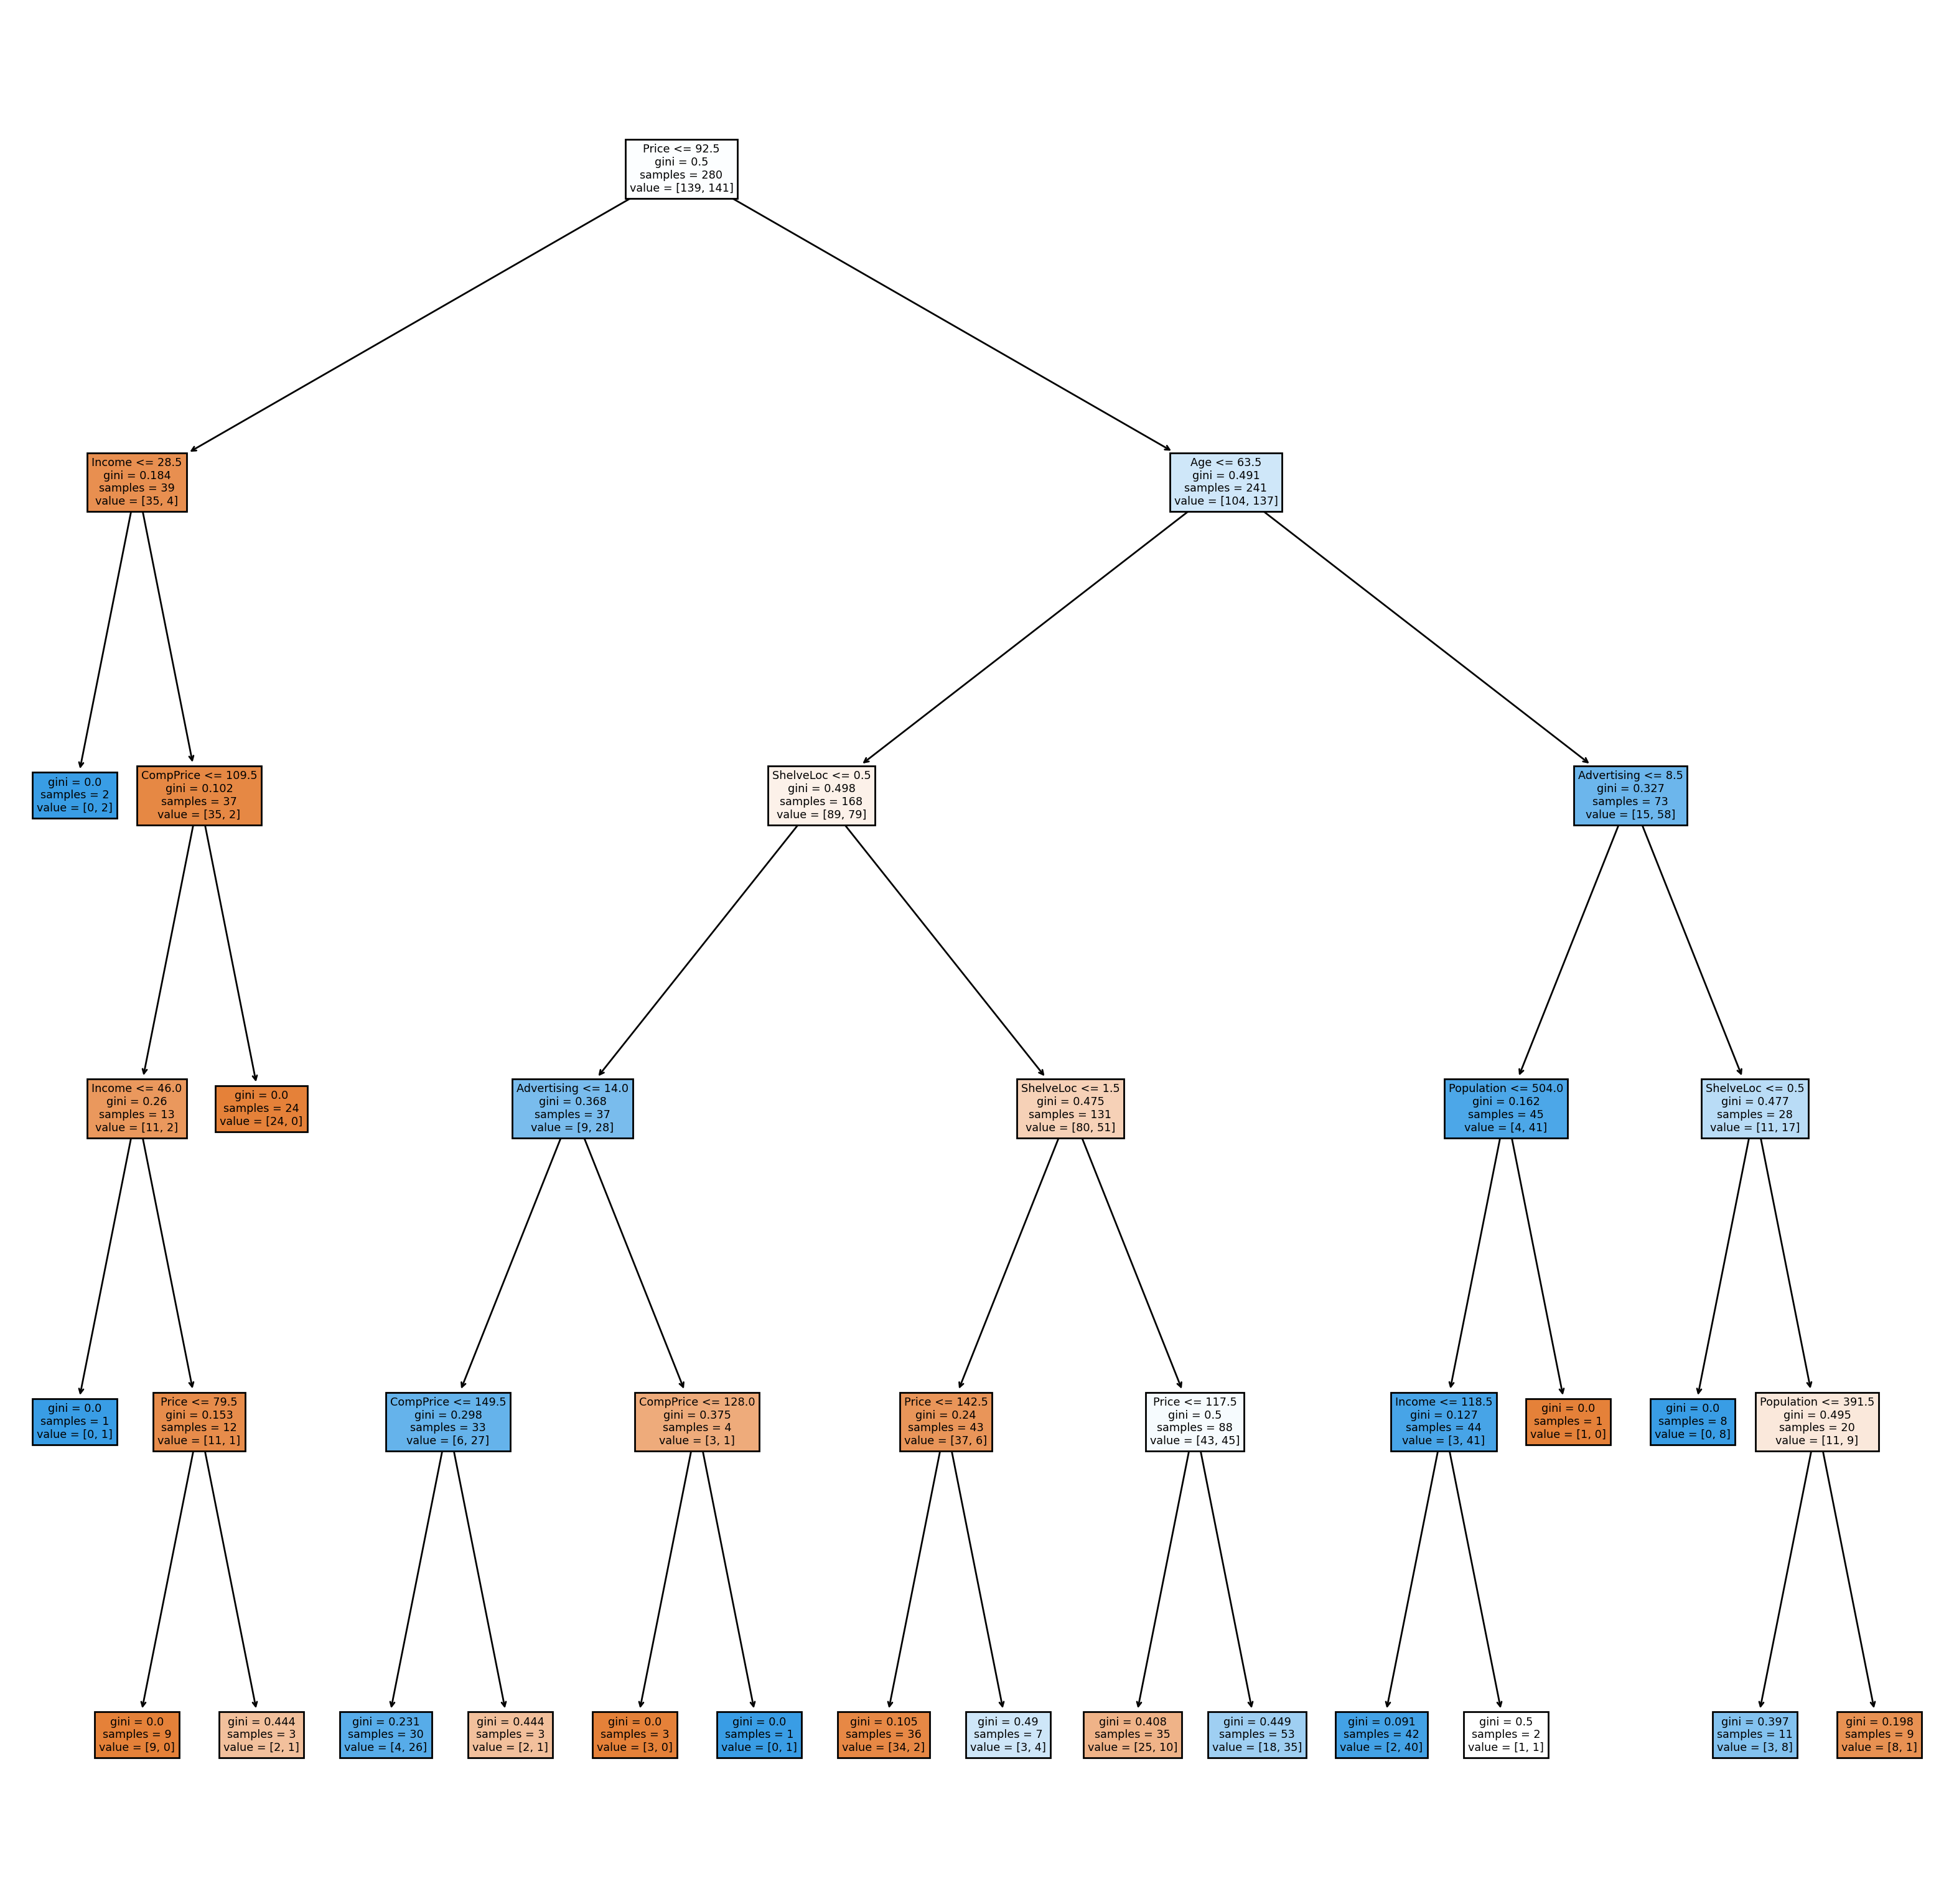

In [47]:
report_model(trimmed_tree)

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        60
           1       0.66      0.82      0.73        60

    accuracy                           0.70       120
   macro avg       0.71      0.70      0.70       120
weighted avg       0.71      0.70      0.70       120





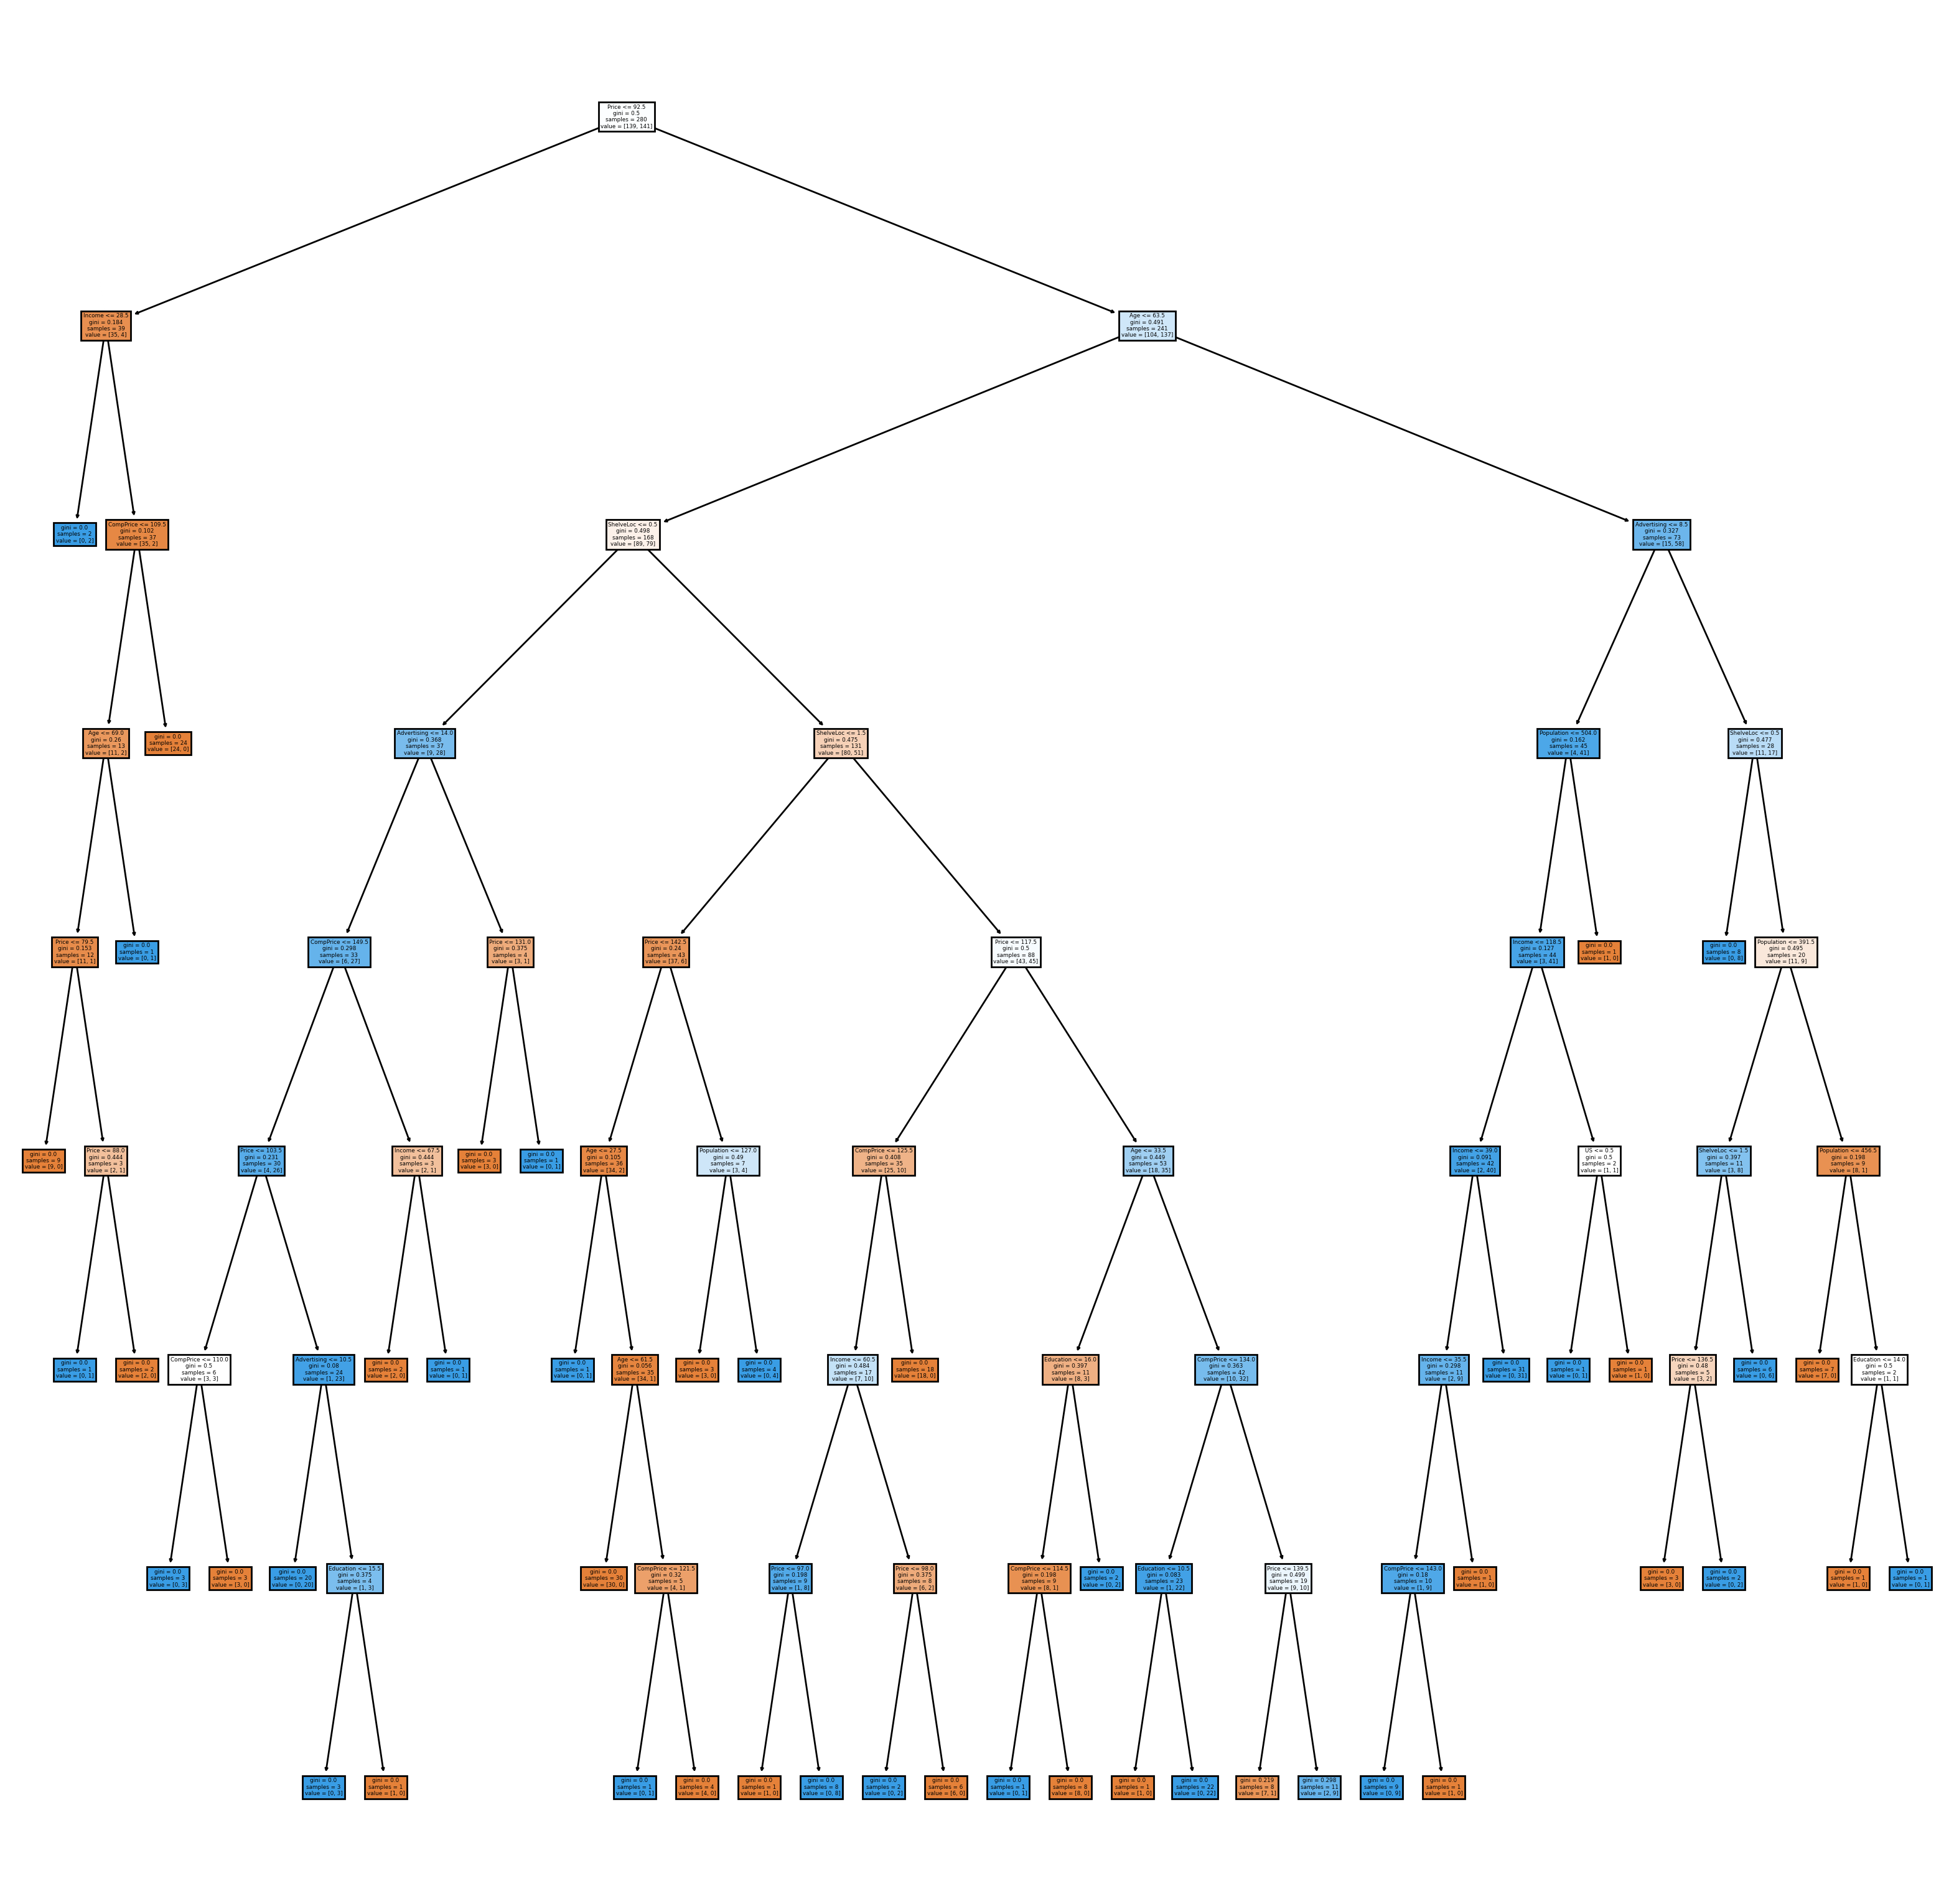

In [48]:
#max depth
trimmed_tree = DecisionTreeClassifier(max_depth=8)
trimmed_tree.fit(X_train,y_train)
report_model(trimmed_tree)

In [49]:
#max leaf nodes
trim2_tree = DecisionTreeClassifier(max_leaf_nodes=10)
trim2_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        60
           1       0.68      0.83      0.75        60

    accuracy                           0.72       120
   macro avg       0.73      0.72      0.71       120
weighted avg       0.73      0.72      0.71       120





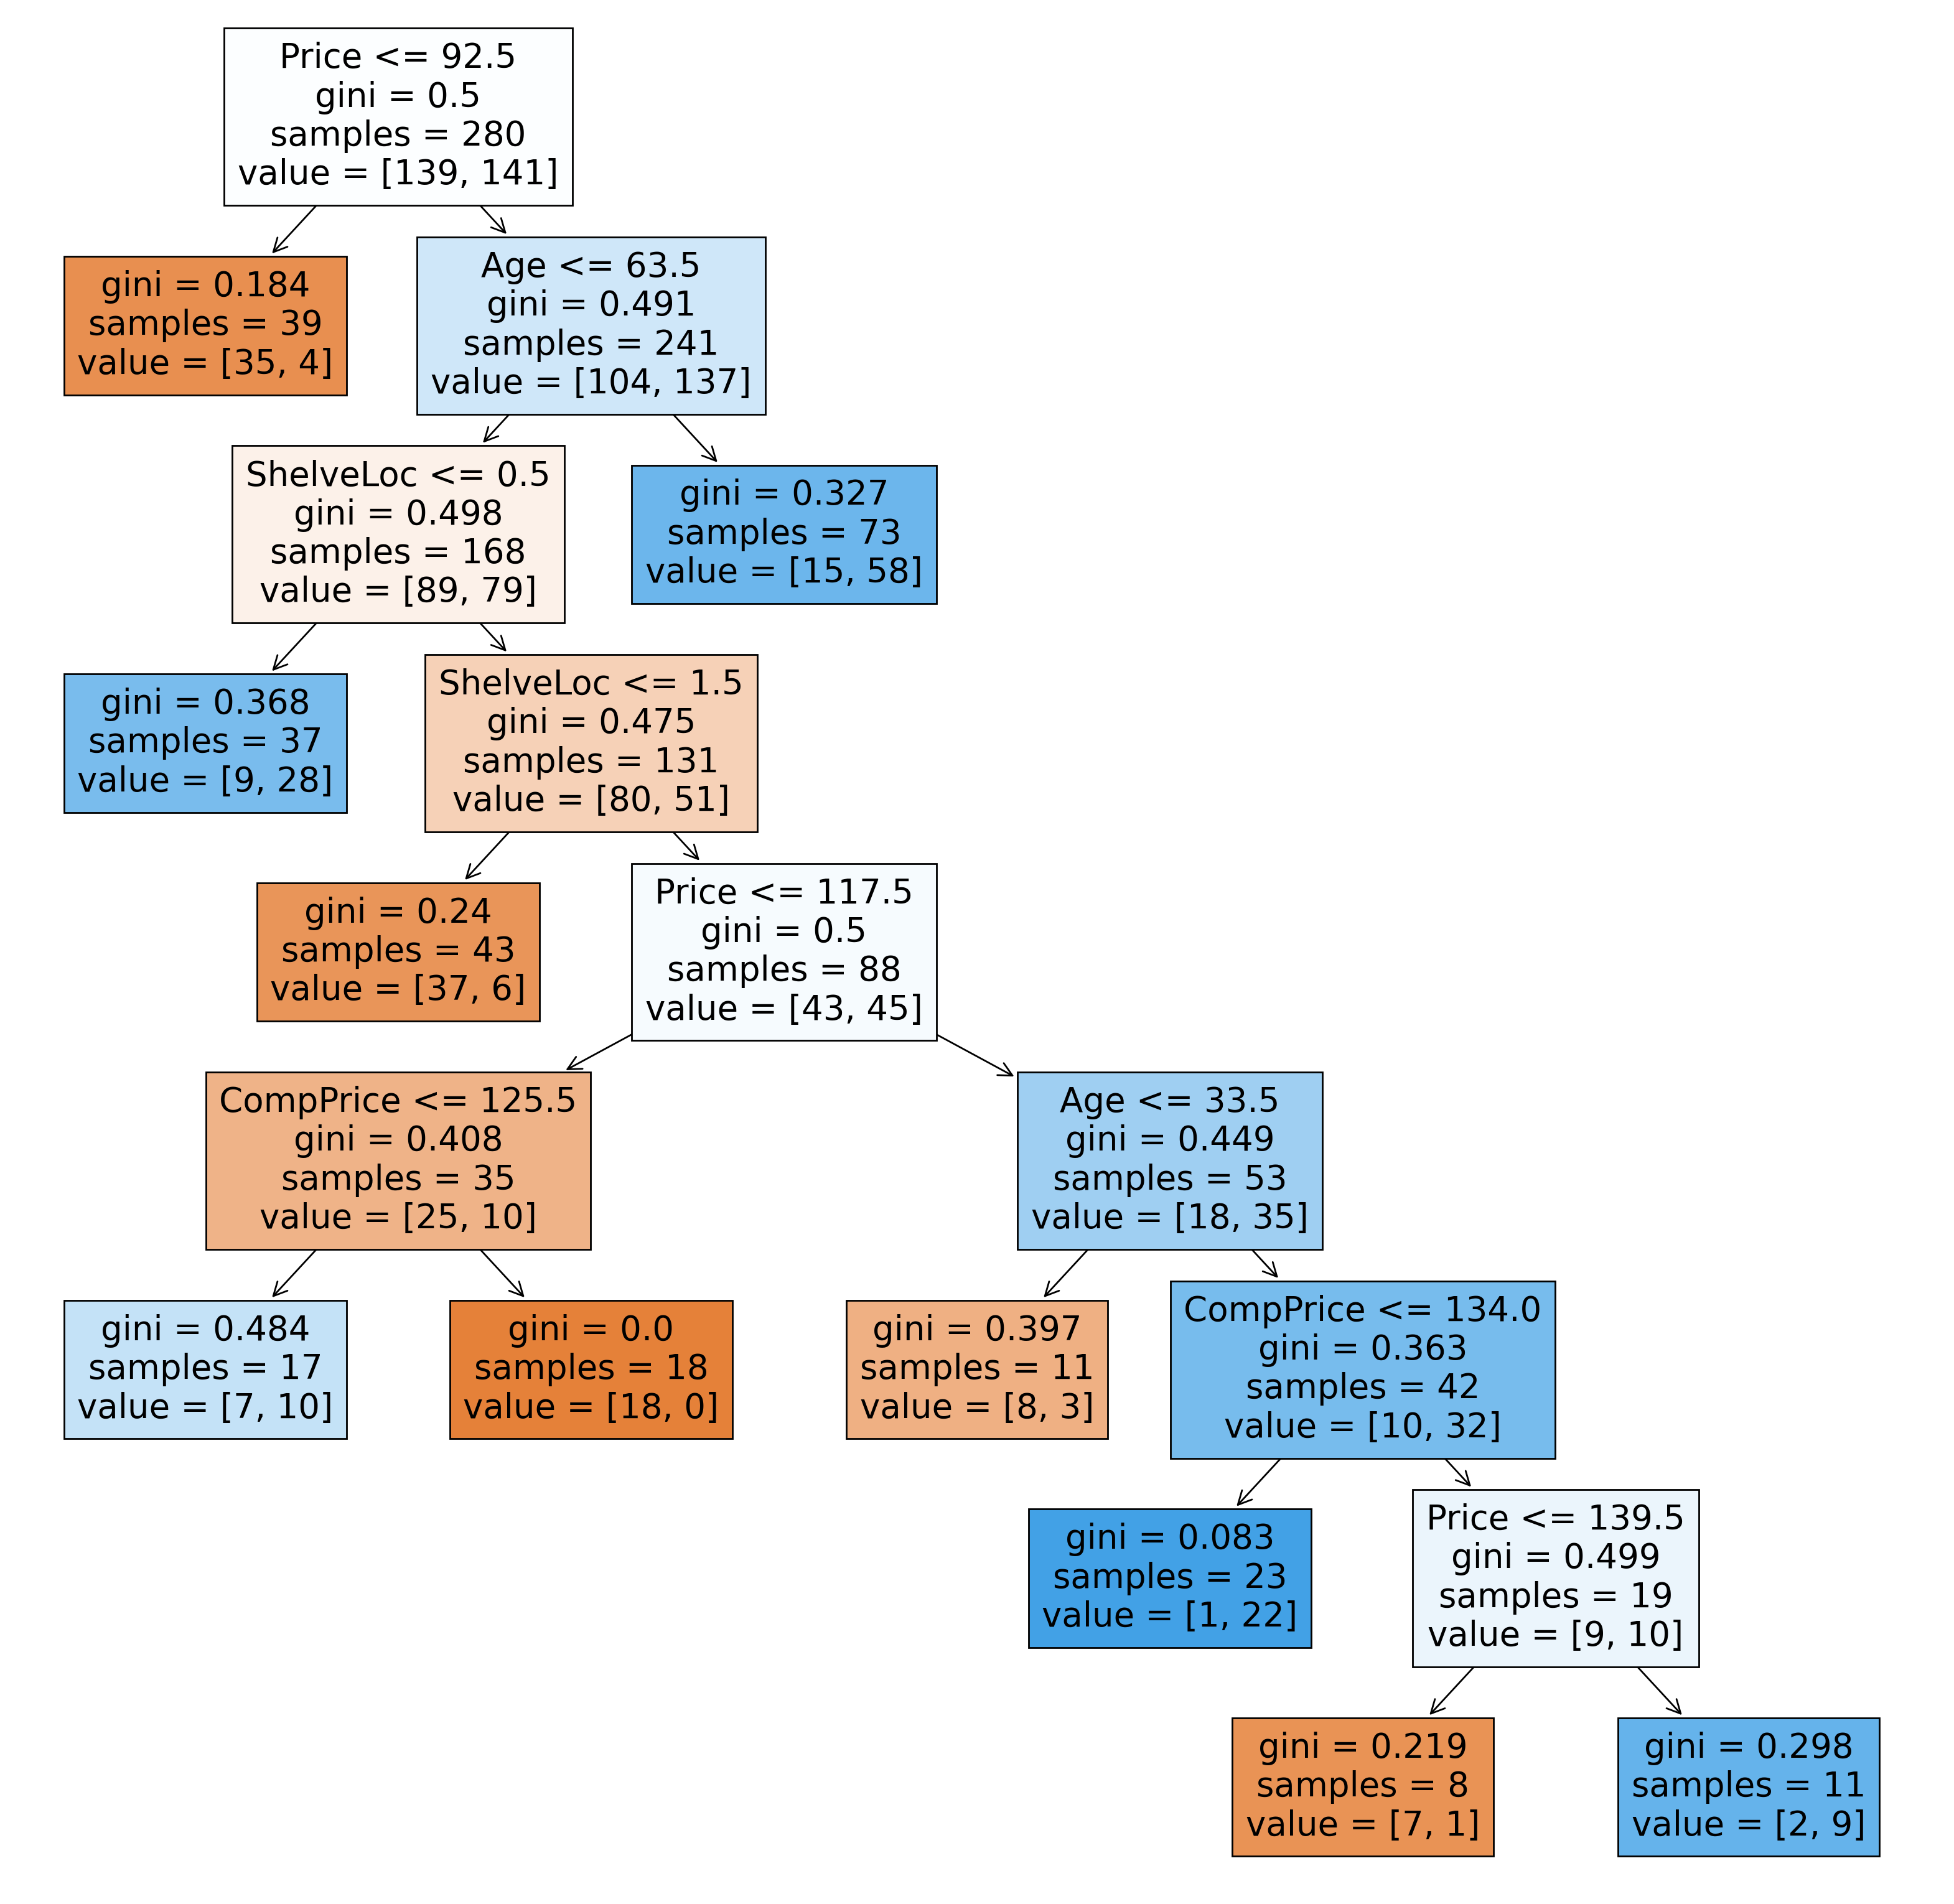

In [50]:
report_model(trim2_tree) 

              precision    recall  f1-score   support

           0       0.76      0.75      0.76        60
           1       0.75      0.77      0.76        60

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120





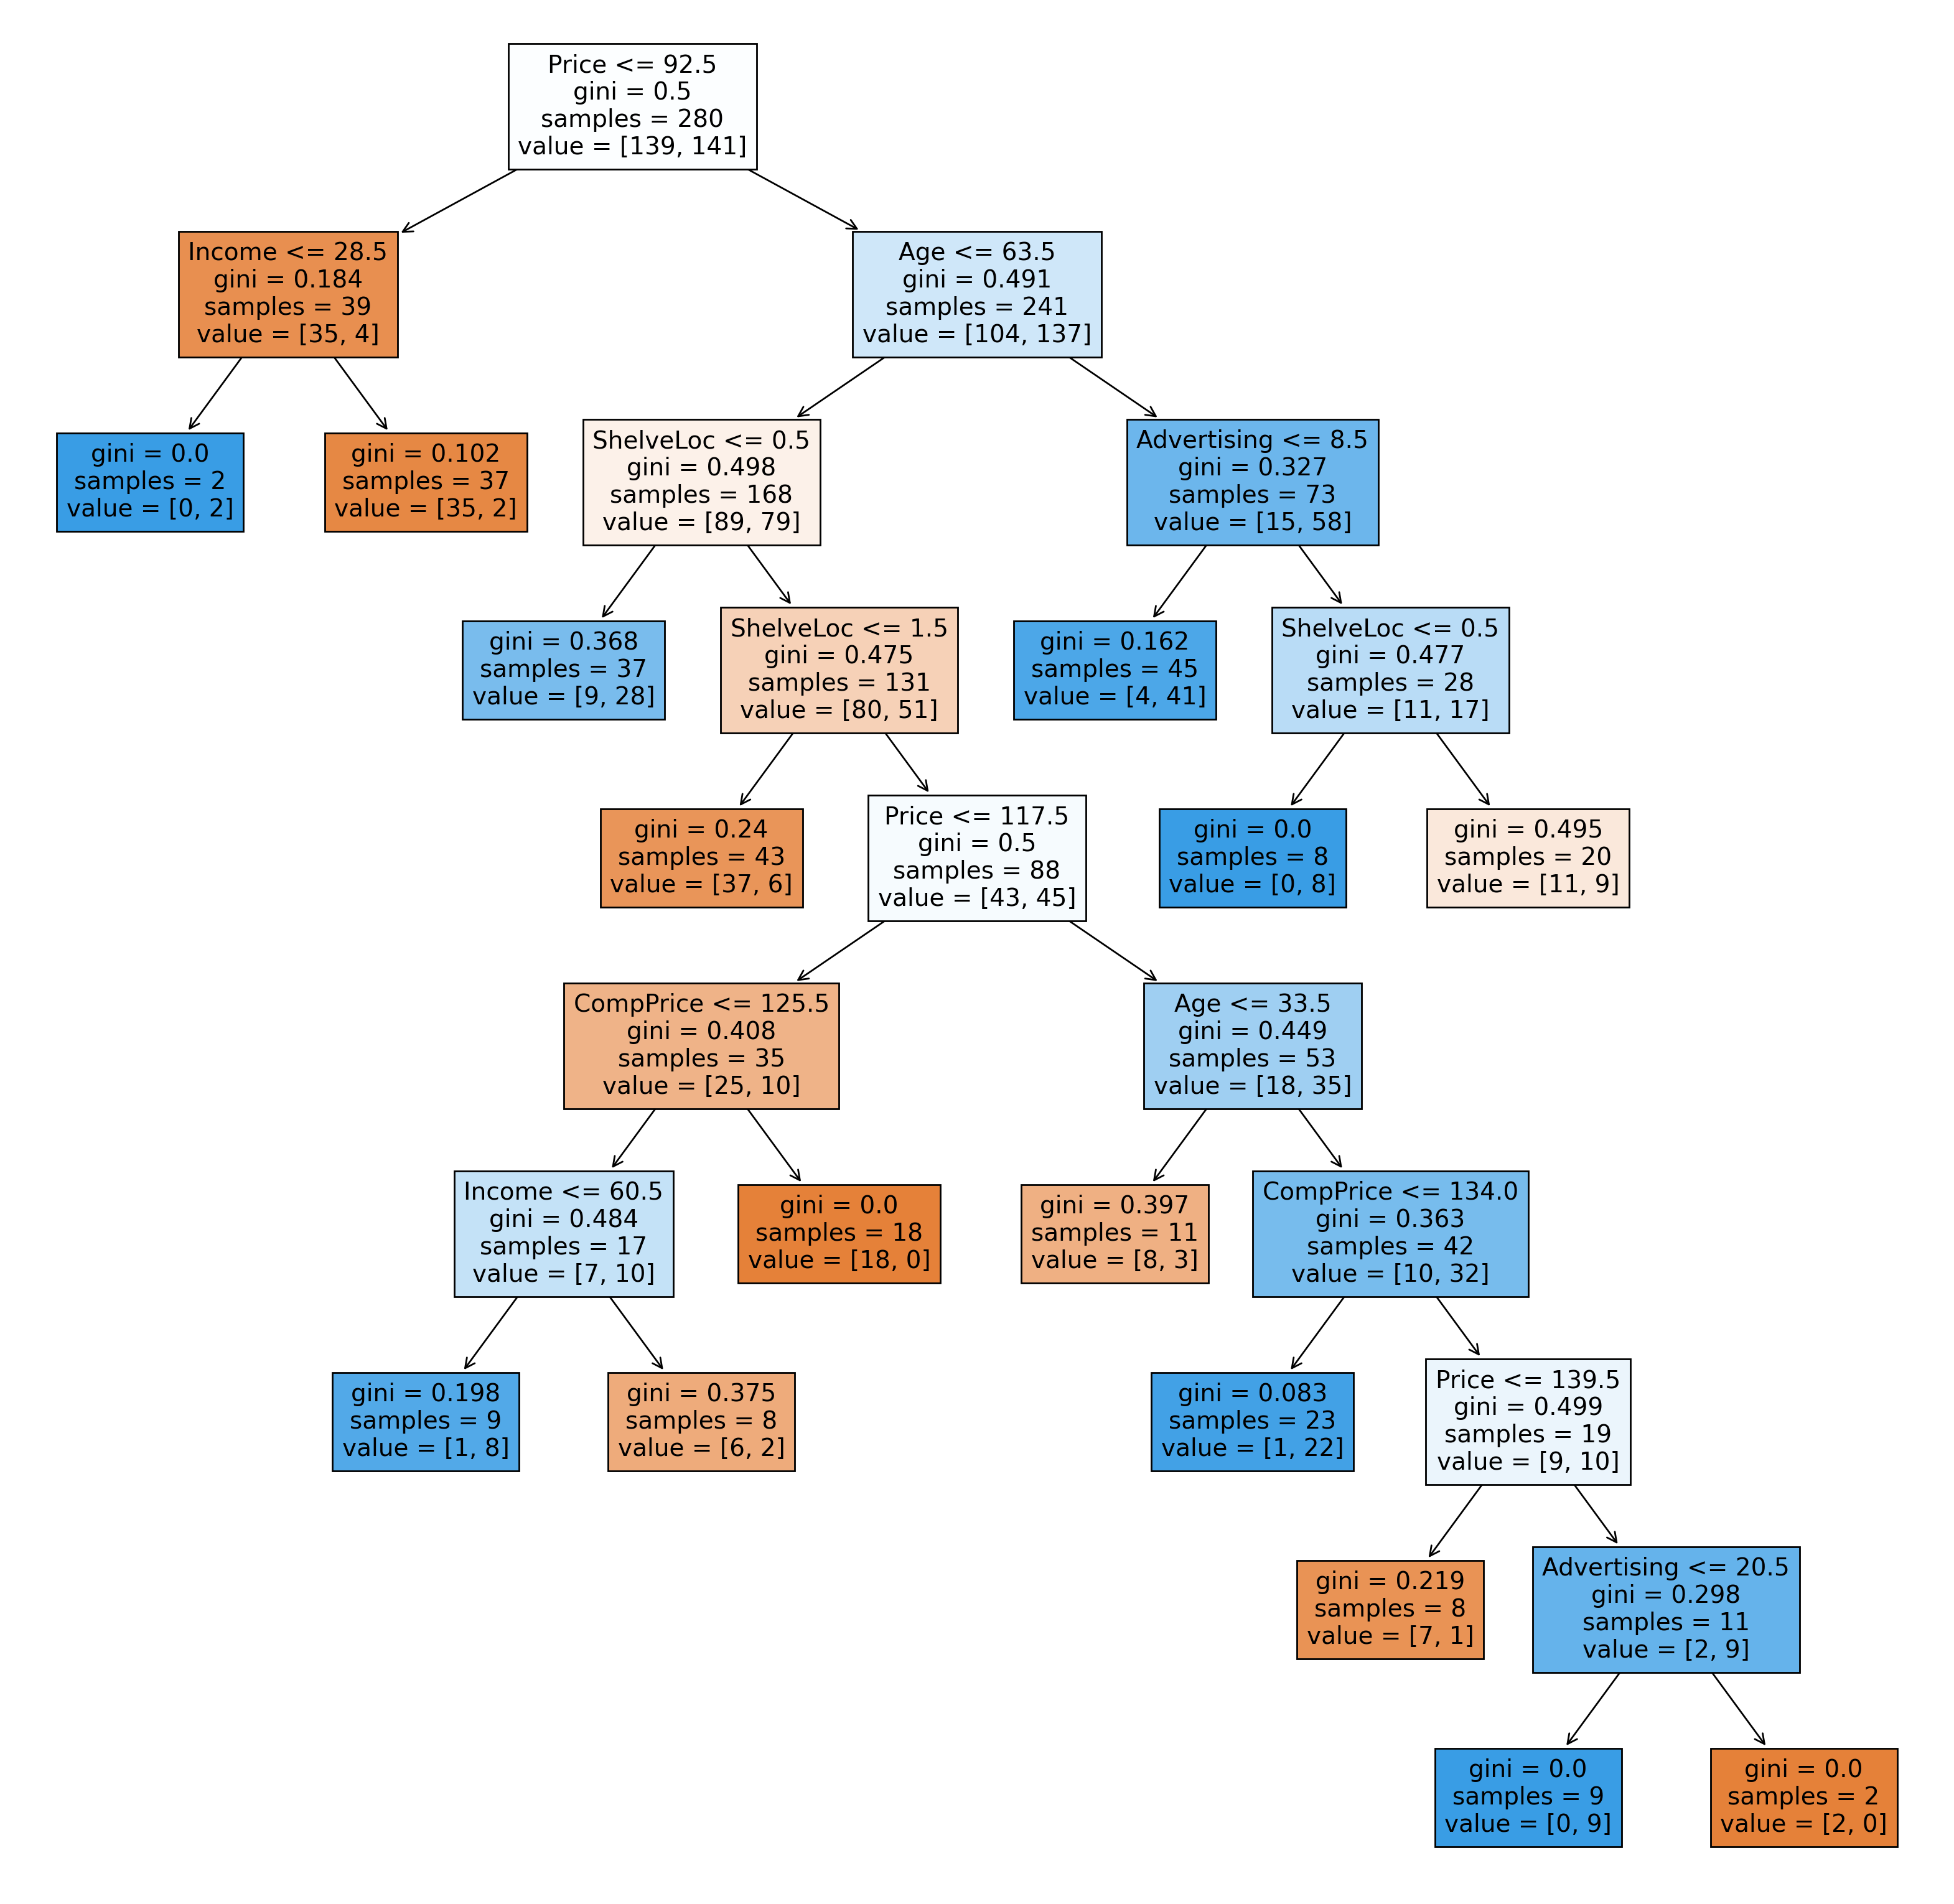

In [51]:
## max leaf nodes = 15
trim3_tree = DecisionTreeClassifier(max_leaf_nodes=15)
trim3_tree.fit(X_train,y_train)
report_model(trim3_tree)

In [52]:
# entropy
#trying crtieria C.50
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        60
           1       0.65      0.75      0.70        60

    accuracy                           0.68       120
   macro avg       0.68      0.68      0.67       120
weighted avg       0.68      0.68      0.67       120





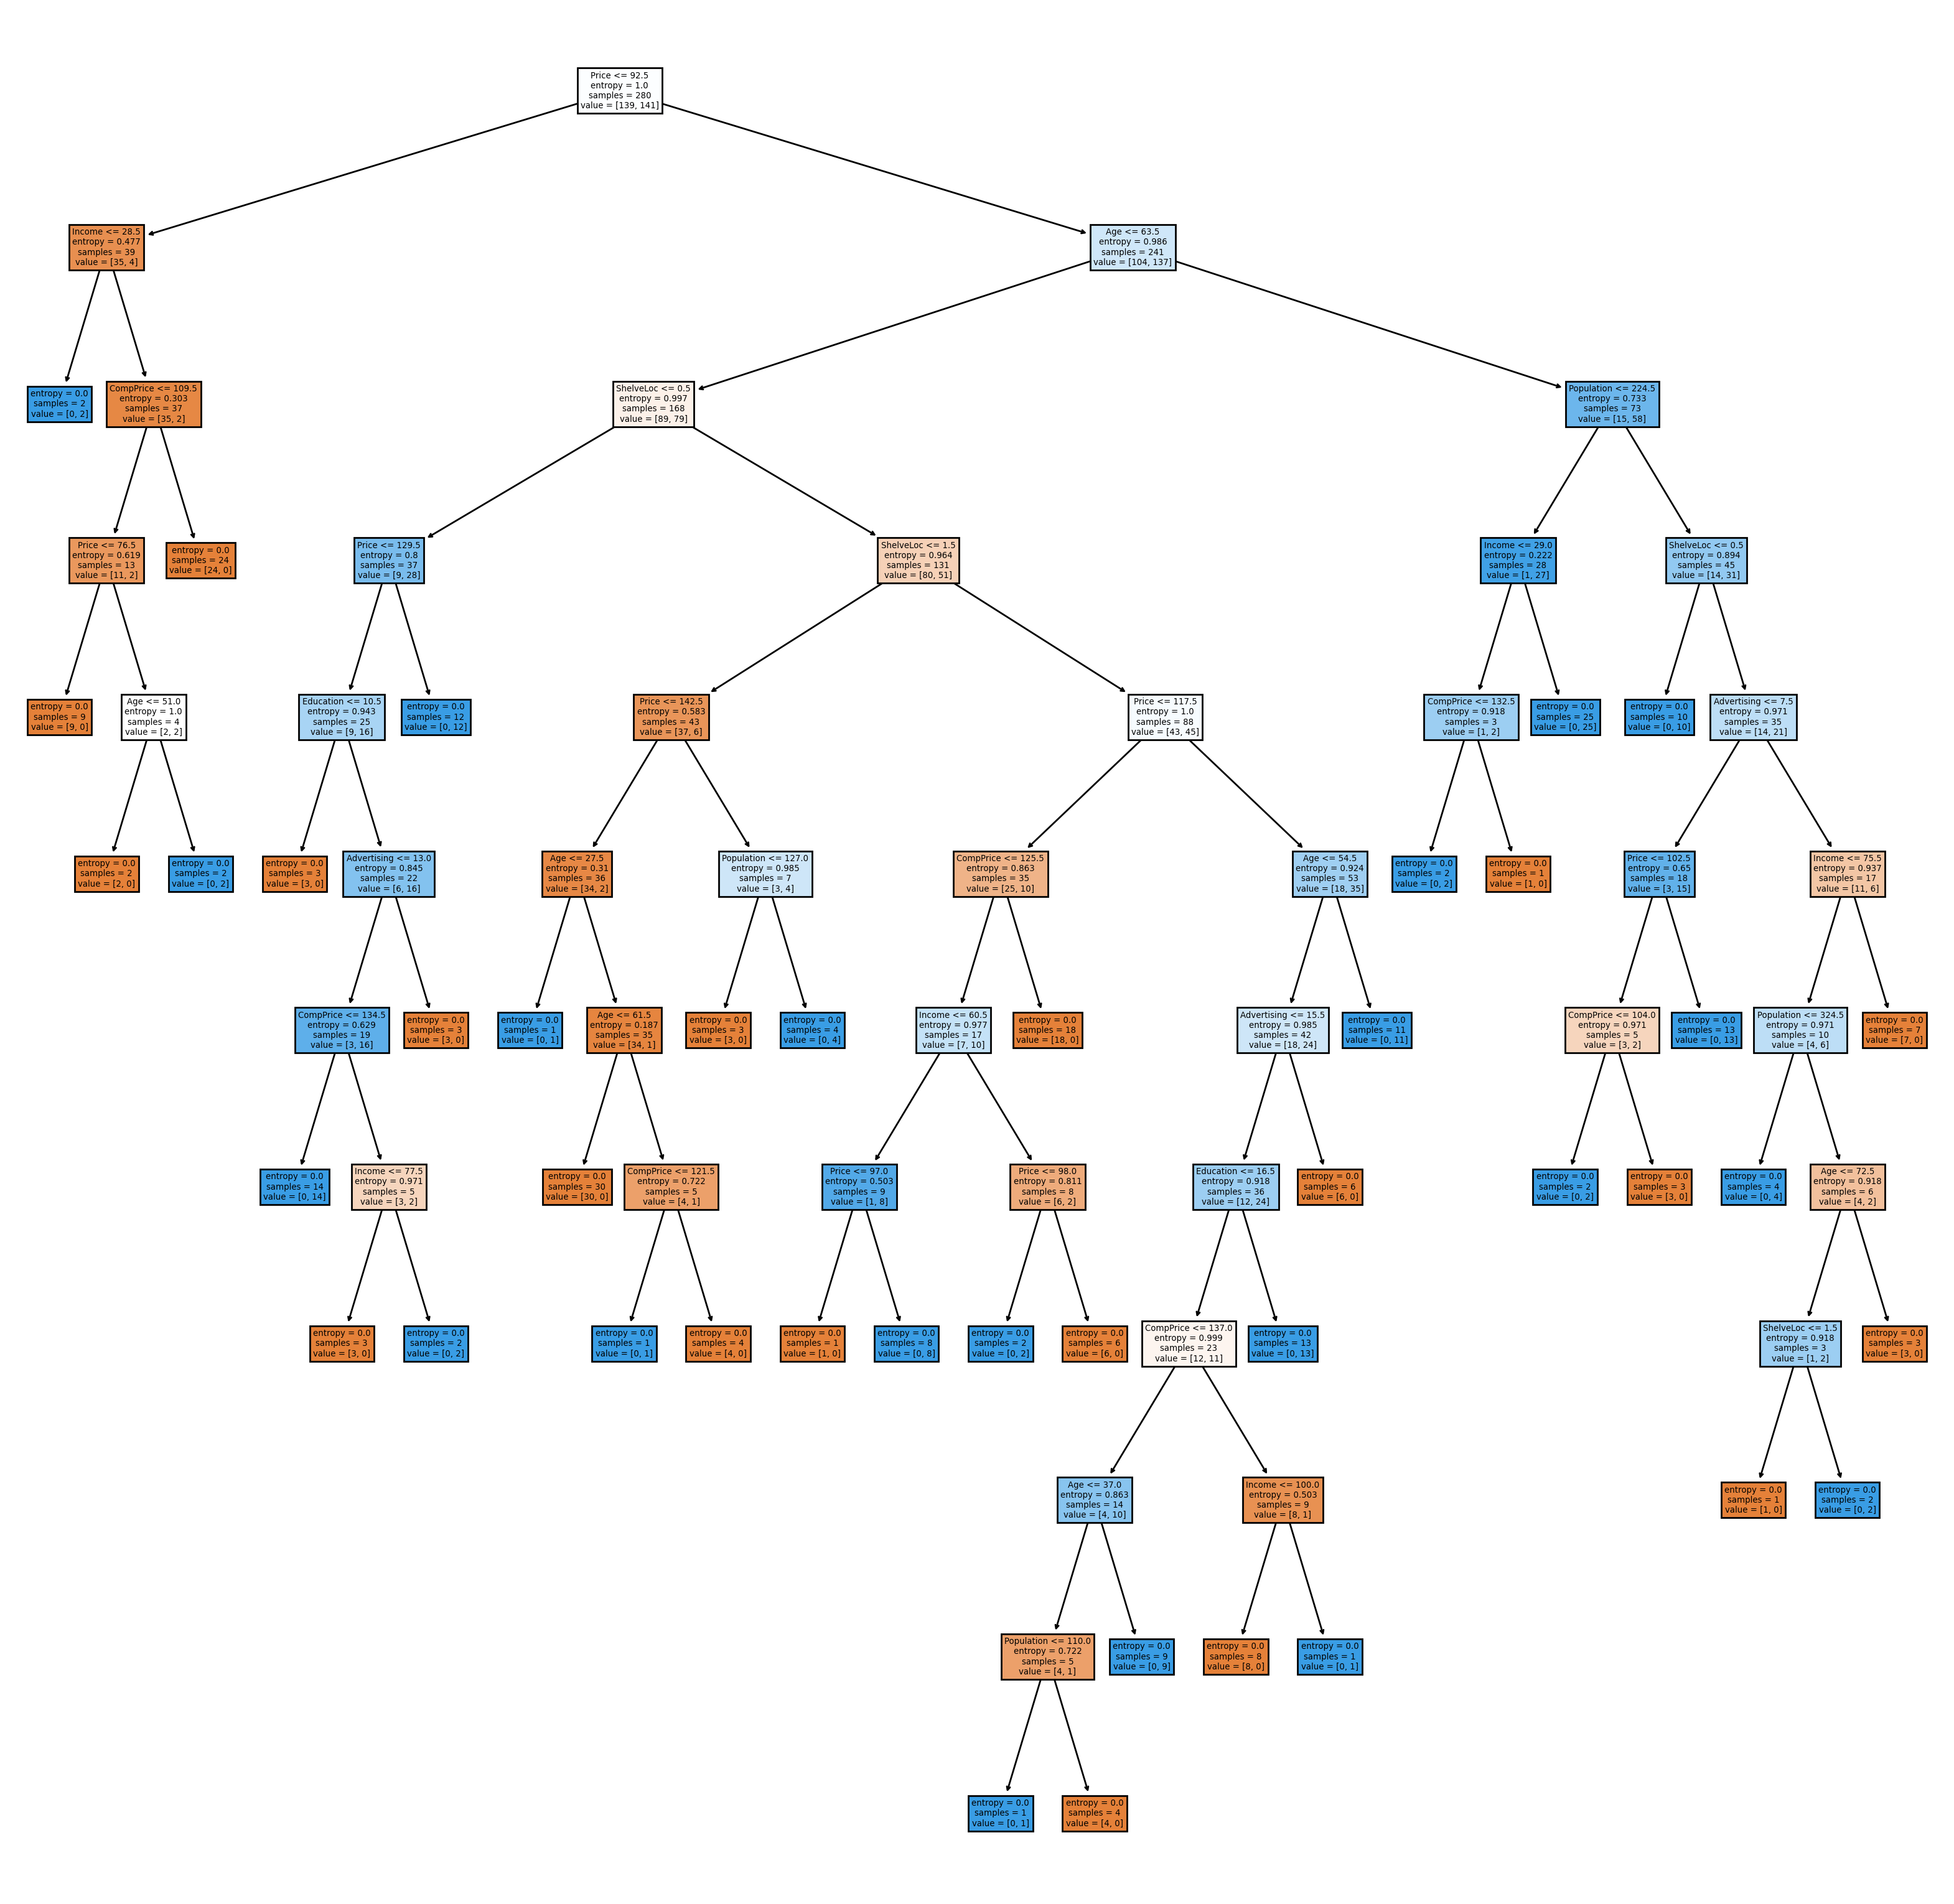

In [53]:
report_model(entropy_tree)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76        60
           1       0.75      0.77      0.76        60

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120





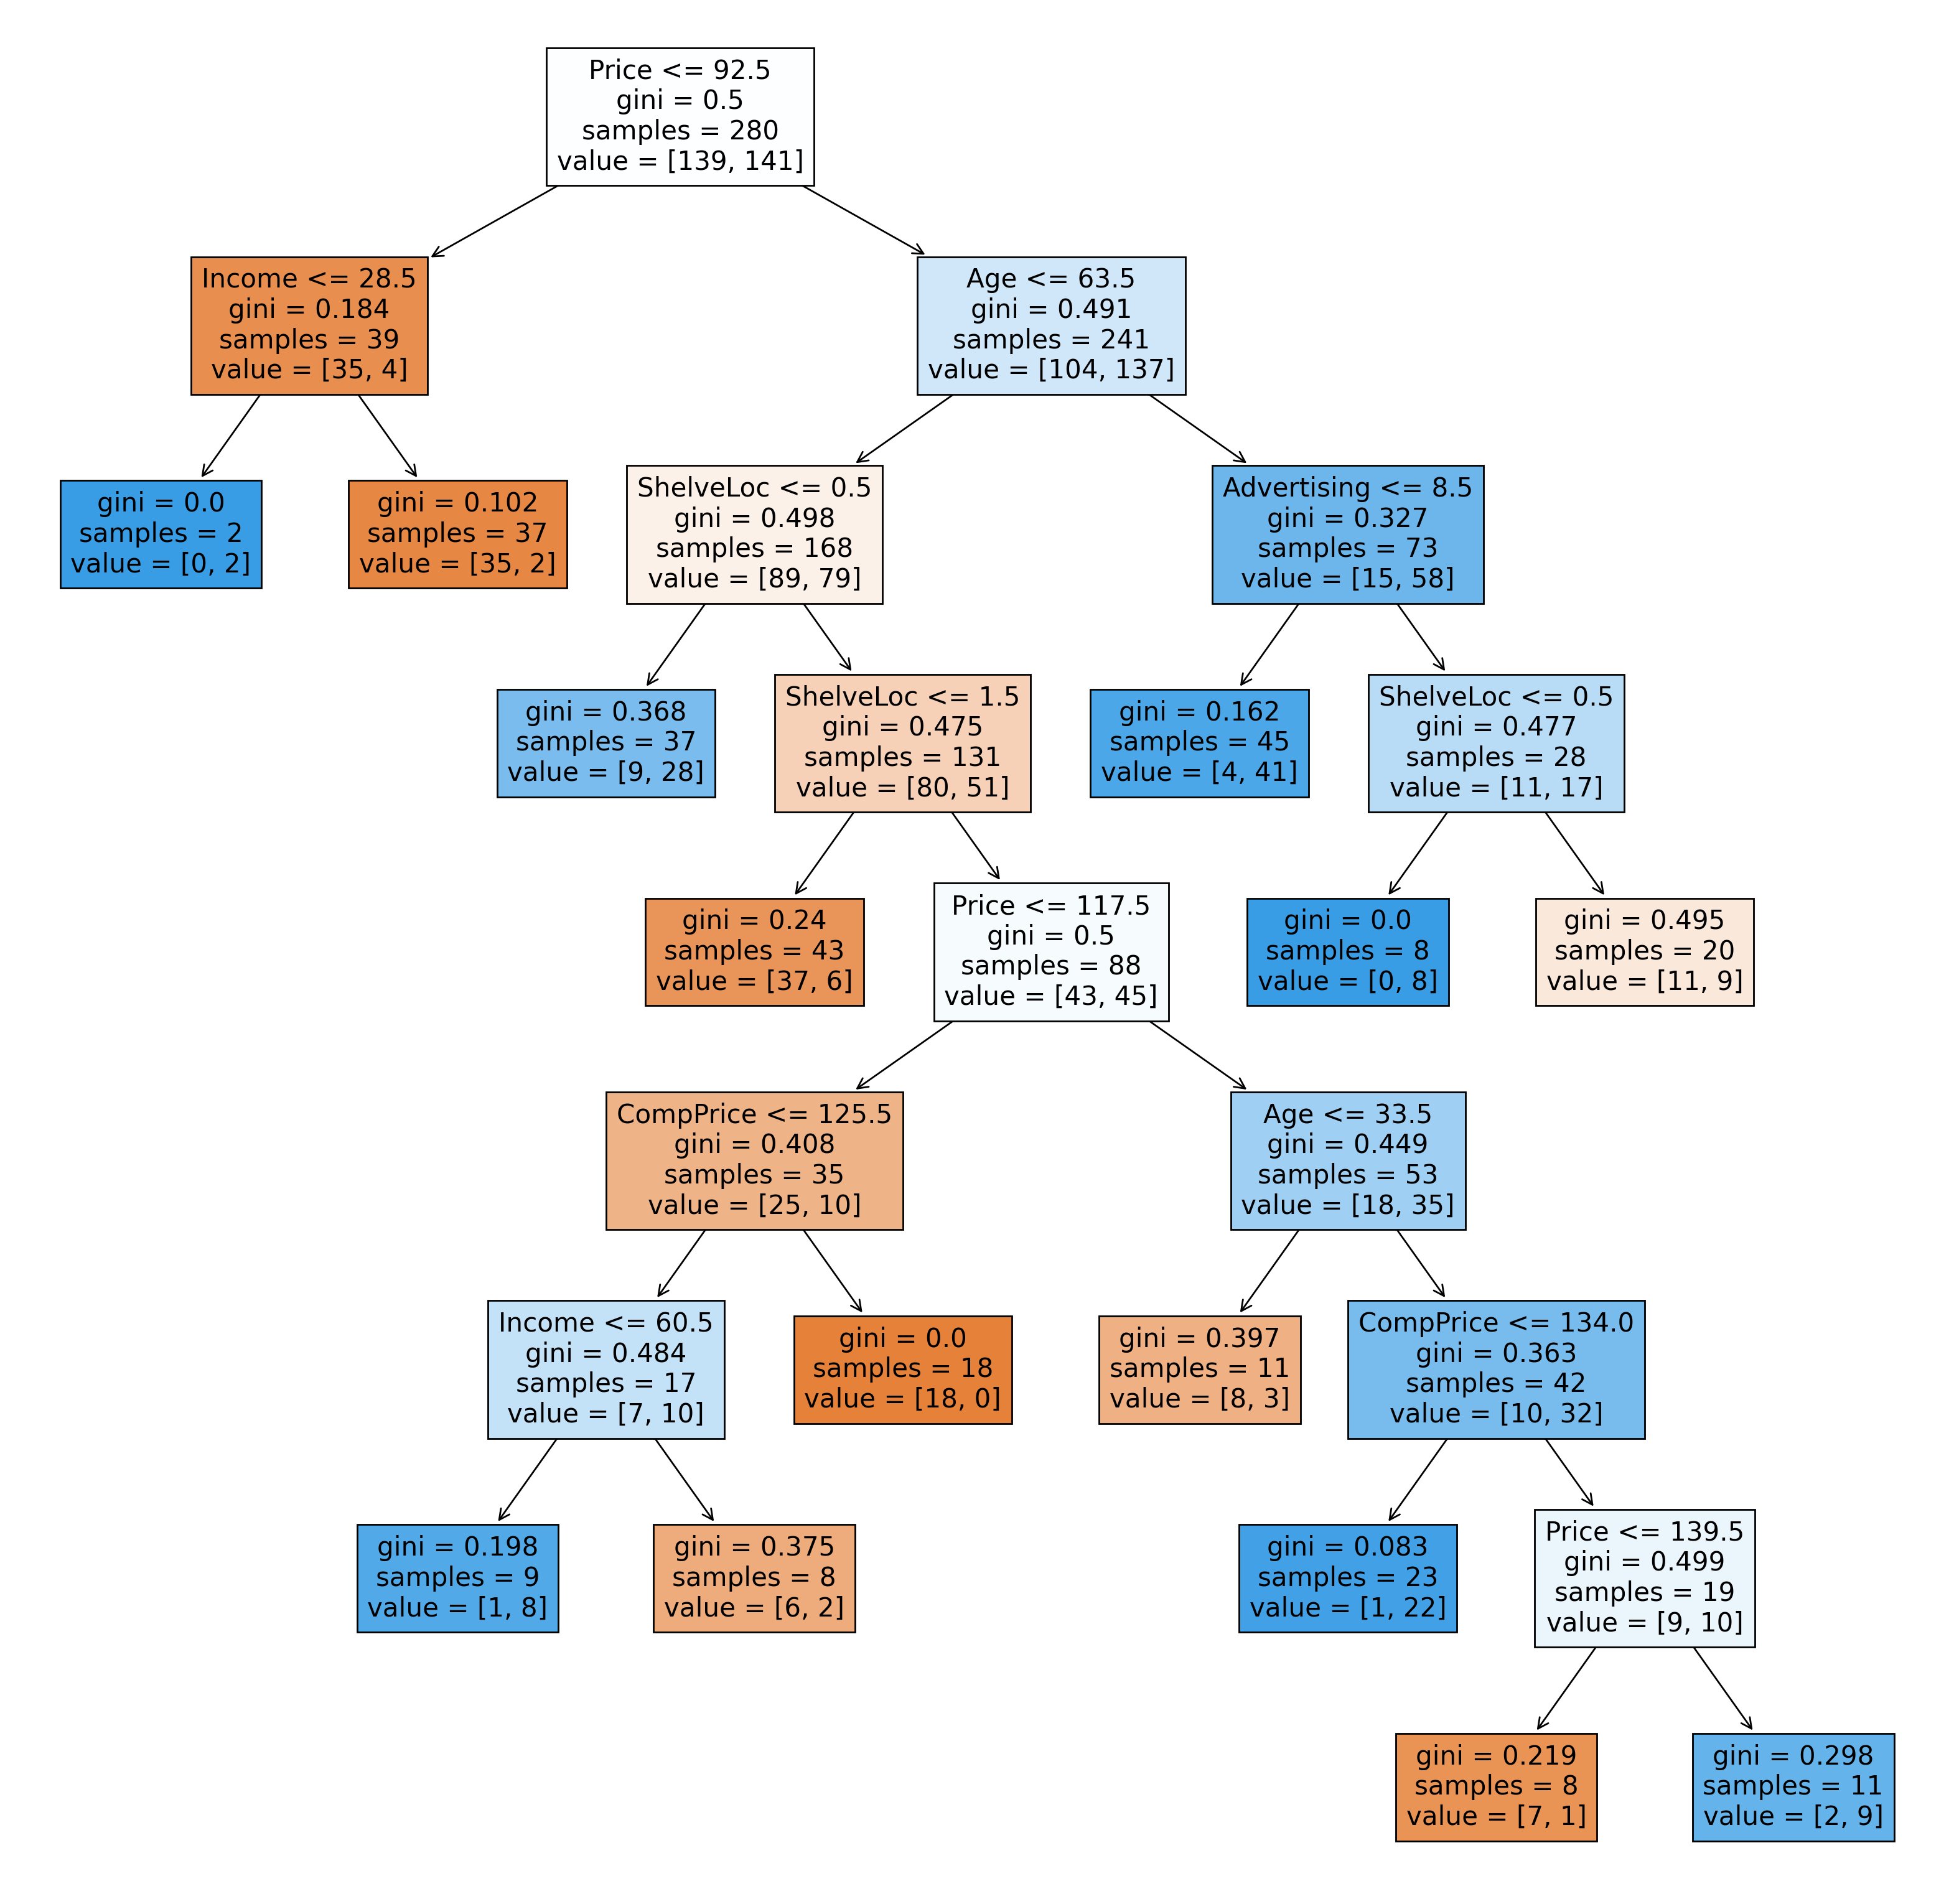

In [54]:
#final model
fnl_model =  DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14)
fnl_model.fit(X_train,y_train)
report_model(fnl_model)

In [55]:
fnl_model.feature_importances_

array([0.12534575, 0.08675423, 0.04037664, 0.        , 0.31573372,
       0.24349458, 0.18829508, 0.        , 0.        , 0.        ])

In [56]:
#decision tree regressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
pred2 = model2.predict(X_test)

In [58]:
confusion_matrix(y_test,pred2)

array([[37, 23],
       [ 9, 51]], dtype=int64)

In [59]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        60
           1       0.69      0.85      0.76        60

    accuracy                           0.73       120
   macro avg       0.75      0.73      0.73       120
weighted avg       0.75      0.73      0.73       120

